# Setup and Standard import

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Mohul\\Documents\\DataScienceAnalytics\\Python\\PythonProjects\\ML_Kaggle\\House_Price'

In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [7]:
housingTrain = pd.read_csv("train.csv")
housingTest= pd.read_csv("test.csv")

In [8]:
trainData = housingTrain.copy()
testData = housingTest.copy()

In [9]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
testData.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


We will remove the 'Id' column as this is just an identifyer seral number for each observations and will impact predictions if it goes into the model.

In [11]:
trainData = trainData.drop('Id', axis= 1)
testData = testData.drop('Id', axis= 1)

In [12]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Text(0.5, 1.0, "Distributon of 'SalePrice'")

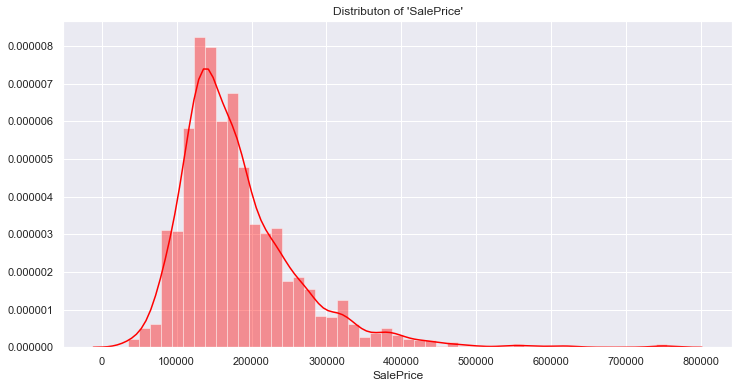

In [13]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['SalePrice'], color= 'red')
plt.title("Distributon of 'SalePrice'")

In [14]:
trainData['log_SalePrice']= np.log(trainData['SalePrice'])

In [22]:
trainData= trainData.drop(['SalePrice'], axis= 1)

Text(0.5, 1.0, "Distributon of log of 'SalePrice'")

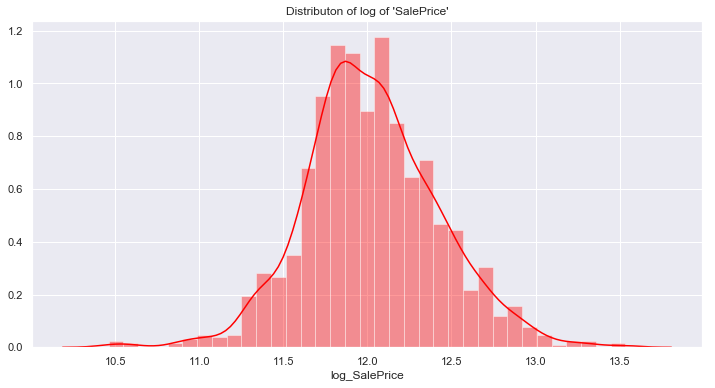

In [23]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['log_SalePrice'], color= 'red')
plt.title("Distributon of log of 'SalePrice'")

In [24]:
dict= {20: '1_Story_New',
      30: '1_Story_Old',
      40: '1_Story_Finished',
      45: '1.5_Story_Unfinished',
      50: '1.5_Story_Finished',
      60: '2_Story_New',
      70: '2_Story_Old',
      75: '2.5_Story',
      80: 'Split_Multi',
      85: 'Split_Foyer',
      90: 'Duplex',
      120: '1_Story_PUD_New',
      150: '1.5_Story_PUD',
       160: '2_Story_PUD_New',
      180: 'Multilevel_PUD',
      190: 'Fam_Coversion'}

In [25]:
trainData['MSSubClass']= trainData['MSSubClass'].map(dict)
testData['MSSubClass']= testData['MSSubClass'].map(dict)

### Missing data exploration and value imputation

In [26]:
def missingCount(df):
    ''' Display missing data count and percentage '''
    missing= pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns= ['variable', 'countMissing']
    missing['pctMissing']= round(missing['countMissing']/len(df), 3)
    missing= missing.loc[missing['countMissing'] > 0].sort_values('pctMissing', ascending = False)
    return missing

In [27]:
missingCount(trainData)

,variable,countMissing,pctMissing
71,PoolQC,1453,0.995
73,MiscFeature,1406,0.963
5,Alley,1369,0.938
72,Fence,1179,0.808
56,FireplaceQu,690,0.473
...,...,...,...
30,BsmtCond,37,0.025
29,BsmtQual,37,0.025
25,MasVnrArea,8,0.005
24,MasVnrType,8,0.005


From the data descriptor we can see that for PoolQC, MiscFeature, Alley, Fence and FireplaceQu the mising data is actually a seperate class 'not available' or 'not present'. Howeverin case of PoolQC, MiscFeature and Alley more than 90% observation are from this class. This will greately reduce prediction power of these variables and we may consider to drop them. 

Lets create a function to replace all NaNs with 'No' in those columns.

In [28]:
def fillingNull(df, columns, string = 'No'):
    '''Fill missing data with a string '''
    for c in columns:
        df[c].fillna(string, inplace= True)

In [29]:
fillingNull(trainData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [30]:
fillingNull(testData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [40]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
25,MasVnrArea,8,0.005


Now, we can see four Garage feature are all aving 81 missing observations and all are basically having no garage. We shall replace this with 'No'

In [41]:
fillingNull(trainData, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish'], 'No')
fillingNull(testData, ['GarageType', 'GarageYrBlt','GarageQual', 'GarageCond', 'GarageFinish'], 'No')

In [42]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
25,MasVnrArea,8,0.005


In [43]:
fillingNull(trainData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')
fillingNull(testData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')

In [44]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
25,MasVnrArea,8,0.005


In [45]:
fillingNull(trainData, ['FireplaceQu'], 'No')
fillingNull(testData, ['FireplaceQu'], 'No')

In [46]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
25,MasVnrArea,8,0.005


In [47]:
missingCount(testData)

,variable,countMissing,pctMissing
2,LotFrontage,227,0.156
25,MasVnrArea,15,0.010
1,MSZoning,4,0.003
46,BsmtFullBath,2,0.001
61,GarageArea,1,0.001
60,GarageCars,1,0.001
54,Functional,2,0.001
52,KitchenQual,1,0.001
47,BsmtHalfBath,2,0.001
36,BsmtUnfSF,1,0.001


### New feature creation

In [48]:
trainData['PoolCat']= pd.cut(trainData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])
testData['PoolCat']= pd.cut(testData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])

In [49]:
trainData= trainData.drop(['PoolArea'], axis= 1)
testData= testData.drop(['PoolArea'], axis= 1)

In [50]:
trainData['TotalSF']= trainData['TotalBsmtSF'] + trainData['1stFlrSF'] + trainData['2ndFlrSF']
testData['TotalSF']= testData['TotalBsmtSF'] + testData['1stFlrSF'] + testData['2ndFlrSF']

In [51]:
trainData['TotalPorchSF']= trainData['OpenPorchSF'] + trainData['EnclosedPorch'] + trainData['3SsnPorch'] + trainData['ScreenPorch']
testData['TotalPorchSF']= testData['OpenPorchSF'] + testData['EnclosedPorch'] + testData['3SsnPorch'] + testData['ScreenPorch']

In [52]:
trainData['RemodYrHapened']= trainData['YearRemodAdd'] - trainData['YearBuilt']
testData['RemodYrHapened']= testData['YearRemodAdd'] - testData['YearBuilt']

In [106]:
trainData= trainData.drop(['YearRemodAdd'], axis= 1)
testData= testData.drop(['YearRemodAdd'], axis= 1)

In [53]:
# Function to convert numerical variables to str variables
def num_to_str(df, cols):
    for c in cols:
        df[c]= df[c].astype('str')

In [54]:
num_to_str(trainData, ['YearBuilt', 'YearRemodAdd',  'YrSold', 'MoSold', 'GarageYrBlt', 'RemodYrHapened'])

In [55]:
trainData.loc[:, ['YearBuilt', 'YearRemodAdd',  'YrSold', 'MoSold', 'GarageYrBlt', 'RemodYrHapened']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
YearBuilt         1460 non-null object
YearRemodAdd      1460 non-null object
YrSold            1460 non-null object
MoSold            1460 non-null object
GarageYrBlt       1460 non-null object
RemodYrHapened    1460 non-null object
dtypes: object(6)
memory usage: 68.5+ KB


In [56]:
num_to_str(testData, ['YearBuilt', 'YearRemodAdd',  'YrSold', 'MoSold', 'GarageYrBlt', 'RemodYrHapened'])

In [57]:
testData.loc[:, ['YearBuilt', 'YearRemodAdd',  'YrSold', 'MoSold', 'GarageYrBlt', 'RemodYrHapened']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
YearBuilt         1459 non-null object
YearRemodAdd      1459 non-null object
YrSold            1459 non-null object
MoSold            1459 non-null object
GarageYrBlt       1459 non-null object
RemodYrHapened    1459 non-null object
dtypes: object(6)
memory usage: 68.5+ KB


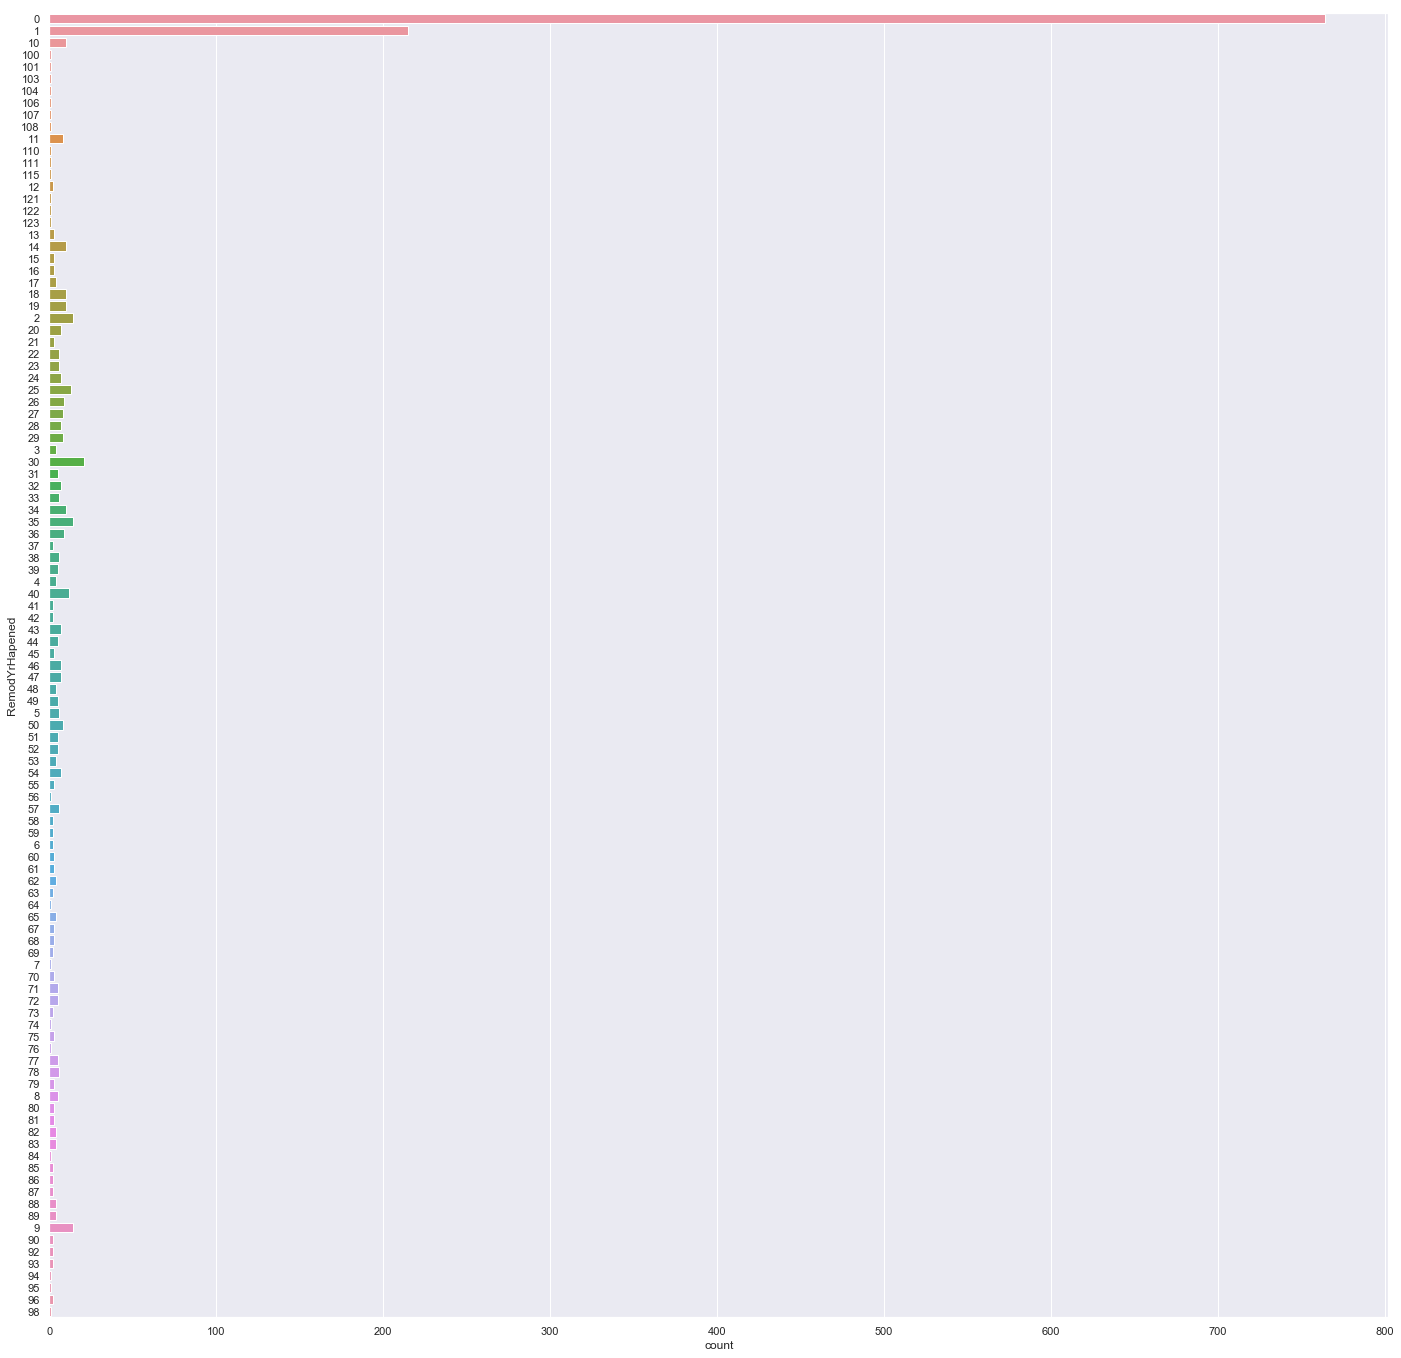

In [114]:
plt.figure(figsize= (24, 24))
sns.countplot(y= 'RemodYrHapened', data= trainData)

### Correlation stdy among numerical variables

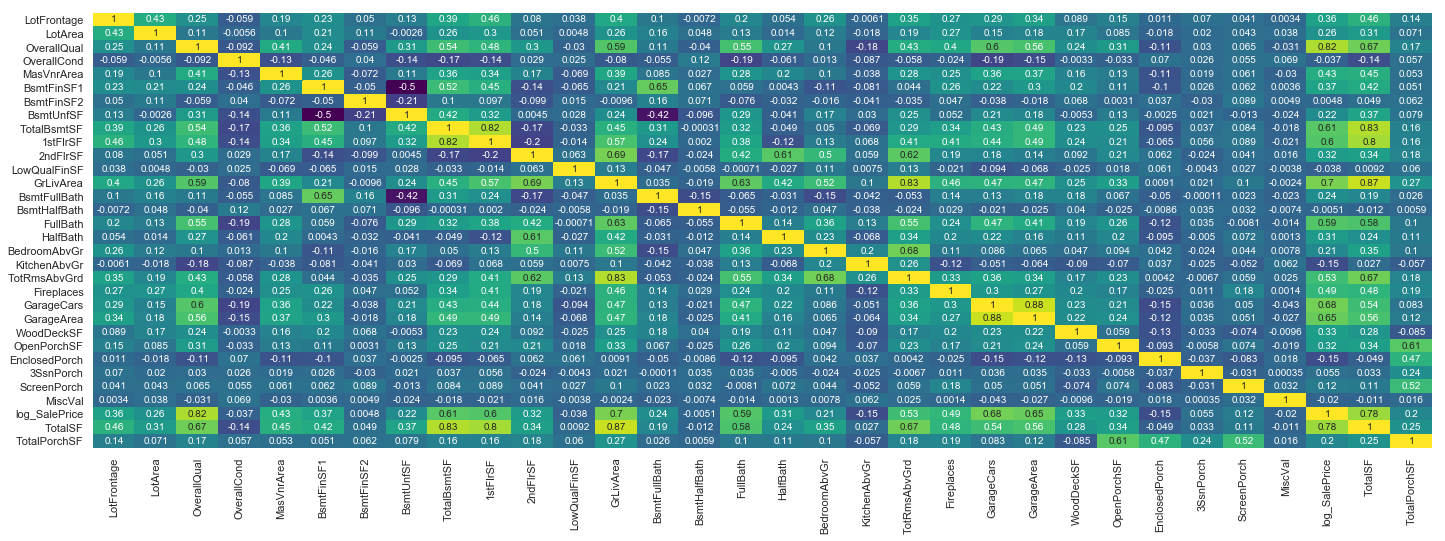

In [58]:
plt.figure(figsize= (24, 8))
sns.heatmap(trainData.corr(), cmap= 'viridis', annot= True, cbar= False)

From the heat map we can see TotalSF exhibited high association with TotalBsmtSF, 1stFlrSF and GrLivAra. After examining correlation with our dependen variable we will keep TotalSF and remove rest 3. 
GarageCars has high colinearity (0.88) with GarageArea. We will remove GarageArea.

In [59]:
trainData= trainData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)
testData= testData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)

## Preparing data for Machine Learning

In [80]:
X= trainData.drop(['log_SalePrice'], axis= 1)

In [81]:
y= trainData['log_SalePrice']

In [97]:
XNum= X.select_dtypes(include= 'number')
XCat= X.select_dtypes(exclude= 'number')

In [99]:
XCat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,PoolCat,RemodYrHapened
0,2_Story_New,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,2003.0,RFn,TA,TA,Y,No,No,No,2,2008,WD,Normal,NoPool,0
1,1_Story_New,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,No,No,No,5,2007,WD,Normal,NoPool,0
2,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,No,No,No,9,2008,WD,Normal,NoPool,1
3,2_Story_Old,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,No,No,No,2,2006,WD,Abnorml,NoPool,55
4,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,No,No,No,12,2008,WD,Normal,NoPool,0
5,1.5_Story_Finished,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,No,Attchd,1993.0,Unf,TA,TA,Y,No,MnPrv,Shed,10,2009,WD,Normal,NoPool,2
6,1_Story_New,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,2004.0,RFn,TA,TA,Y,No,No,No,8,2007,WD,Normal,NoPool,1
7,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1973.0,RFn,TA,TA,Y,No,No,Shed,11,2009,WD,Normal,NoPool,0
8,1.5_Story_Finished,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,1931.0,Unf,Fa,TA,Y,No,No,No,4,2008,WD,Abnorml,NoPool,19
9,Fam_Coversion,RL,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1939.0,RFn,Gd,TA,Y,No,No,No,1,2008,WD,Normal,NoPool,11


In [96]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
imputer= SimpleImputer(strategy= 'median')

In [85]:
imputer.fit(XNum)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [86]:
imputer.statistics_

array([6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00, 0.0000e+00,
       3.8350e+02, 0.0000e+00, 4.7750e+02, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 4.8000e+02, 0.0000e+00,
       2.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       2.4740e+03, 4.8000e+01])

In [92]:
XTransformed= imputer.transform(XNum)

In [94]:
XTransformed= pd.DataFrame(X, columns= X.columns)

In [95]:
missingCount(XTransformed)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
25,MasVnrArea,8,0.005


## Train and Test splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(housing, test_size= 0.2, random_state= 42)

In [55]:
print(train.shape, test.shape)

(1168, 77) (292, 77)


we will now use a copy of train data to do all EDA

In [56]:
housingTrain = train.copy()

### Need to perform detail EDA and new feature creation

In [77]:
housingTrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,1_Story_New,RL,70.0,8400,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1,0,1,0,3,1,TA,5,Typ,0,No,Attchd,RFn,294,TA,TA,Y,250,0,0,0,0,0,No,No,No,0,6,2010,WD,Normal,145000
1066,2_Story_New,RL,59.0,7837,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,380,TA,TA,Y,0,40,0,0,0,0,No,No,No,0,5,2009,WD,Normal,178000
638,1_Story_Old,RL,67.0,8777,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,0,0,1,0,2,1,TA,4,Typ,0,No,No,No,0,No,No,P,328,0,164,0,0,0,No,MnPrv,No,0,5,2008,WD,Normal,85000
799,1.5_Story_Finished,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,Unf,240,TA,TA,Y,0,0,264,0,0,0,No,MnPrv,No,0,6,2007,WD,Normal,175000
380,1.5_Story_Finished,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,Unf,308,TA,TA,Y,0,0,242,0,0,0,No,No,No,0,5,2010,WD,Normal,127000


### We will create some new features

In [83]:
# PricePerSft
housingTrain.eval('PricePerSft= SalePrice/LotArea', inplace= True)
housingTrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSft
254,1_Story_New,RL,70.0,8400,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1,0,1,0,3,1,TA,5,Typ,0,No,Attchd,RFn,294,TA,TA,Y,250,0,0,0,0,0,No,No,No,0,6,2010,WD,Normal,145000,17.261905
1066,2_Story_New,RL,59.0,7837,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,380,TA,TA,Y,0,40,0,0,0,0,No,No,No,0,5,2009,WD,Normal,178000,22.712773
638,1_Story_Old,RL,67.0,8777,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,0,0,1,0,2,1,TA,4,Typ,0,No,No,No,0,No,No,P,328,0,164,0,0,0,No,MnPrv,No,0,5,2008,WD,Normal,85000,9.684402
799,1.5_Story_Finished,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,Unf,240,TA,TA,Y,0,0,264,0,0,0,No,MnPrv,No,0,6,2007,WD,Normal,175000,24.305556
380,1.5_Story_Finished,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,Unf,308,TA,TA,Y,0,0,242,0,0,0,No,No,No,0,5,2010,WD,Normal,127000,25.400000


<Figure size 1152x432 with 0 Axes>

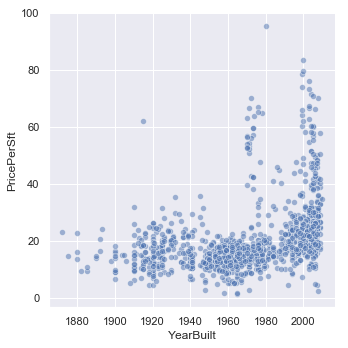

In [94]:
plt.figure(figsize= (16,6))
sns.relplot(x= 'YearBuilt', y= 'PricePerSft', sizes=(40, 400), alpha=.5, palette="muted", data= housingTrain)

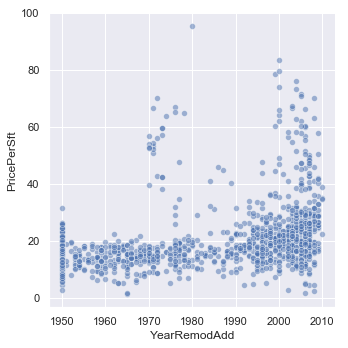

In [97]:
sns.relplot(x= 'YearRemodAdd', y= 'PricePerSft', sizes=(40, 400), alpha=.5, palette="muted", data= housingTrain)

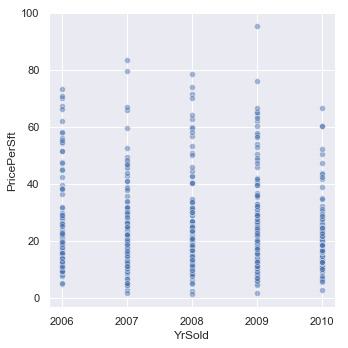

In [98]:
sns.relplot(x= 'YrSold', y= 'PricePerSft', sizes=(40, 400), alpha=.5, palette="muted", data= housingTrain)

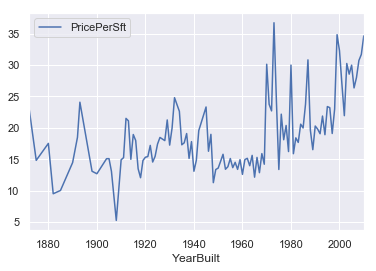

In [84]:
housingTrain.groupby('YearBuilt')[['PricePerSft']].mean().plot()

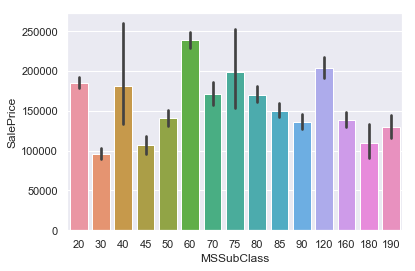

In [28]:
sns.barplot(x= 'MSSubClass', y= 'SalePrice', data= housingTrain)

### We will create a pipeline whic will take a dataframe as input and return  processed dataframe for feeding through different ML algorithms

In [57]:
XTrain = housingTrain.drop('SalePrice', axis= 1)

In [58]:
yTrain = housingTrain['SalePrice'].copy()

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [60]:
XTrainNum = XTrain.select_dtypes(include= [np.number])
XTrainCat = XTrain.select_dtypes(exclude= [np.number])

In [61]:
numAttribs= list(XTrainNum)
catAttribs= list(XTrainCat)

In [62]:
numPipeline= Pipeline([
    ('imputer', SimpleImputer(strategy= 'median'))
])

In [34]:
noTransformPipeline= ColumnTransformer([
    ('num', numPipeline, numAttribs),
    ('cat', OneHotEncoder(sparse= False), catAttribs),
])

In [35]:
XTrainPrep = noTransformPipeline.fit_transform(XTrain)

In [36]:
XTrainPrep.shape

(1168, 298)

In [37]:
pd.DataFrame(XTrainPrep).head()

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
XTrainNum

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,70.0,8400,5,6,1957,1957,0.0,922,0,392,...,294,250,0,0,0,0,0,0,6,2010
1066,59.0,7837,6,7,1993,1994,0.0,0,0,799,...,380,0,40,0,0,0,0,0,5,2009
638,67.0,8777,5,7,1910,1950,0.0,0,0,796,...,0,328,0,164,0,0,0,0,5,2008
799,60.0,7200,5,7,1937,1950,252.0,569,0,162,...,240,0,0,264,0,0,0,0,6,2007
380,50.0,5000,5,6,1924,1950,0.0,218,0,808,...,308,0,0,242,0,0,0,0,5,2010
303,70.0,9800,5,7,1972,1972,0.0,894,0,0,...,552,256,0,0,0,0,0,0,7,2006
86,122.0,11911,6,5,2005,2005,0.0,0,0,684,...,400,100,38,0,0,0,0,0,3,2009
1385,40.0,5436,4,8,1922,2007,0.0,735,0,61,...,240,0,96,0,0,0,0,0,5,2010
265,78.0,12090,6,6,1981,1981,210.0,588,228,606,...,576,276,0,0,0,0,0,0,6,2008
793,76.0,9158,8,5,2007,2007,140.0,0,0,1496,...,474,168,130,0,0,0,0,0,6,2007


In [38]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(XTrainPrep, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
yTrainPred = linReg.predict(XTrainPrep)

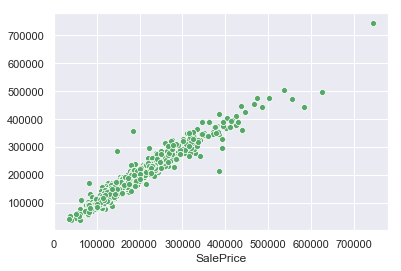

In [40]:
sns.scatterplot(x= yTrain, y= yTrainPred, color = 'g')

In [210]:
from sklearn import metrics

def modelRMSE(model, X):
    yTrainPred = model.predict(X)
    MSE = metrics.mean_squared_error(yTrain, yTrainPred)
    RMSE = np.sqrt(MSE)
    print(RMSE)

In [212]:
modelRMSE(linReg, X= XTrainPrep)

18905.900153420345


In [188]:
from sklearn.linear_model import SGDRegressor

sgdReg = SGDRegressor(n_iter= 50, penalty= None, eta0= 0.1, random_state= 42)
sgdReg.fit(XTrainPrep, yTrain)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [189]:
yTrainPredSGD = sgdReg.predict(XTrainPrep)

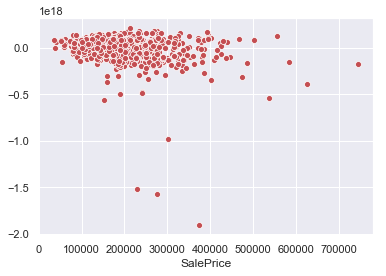

In [190]:
sns.scatterplot(x= yTrain, y= yTrainPredSGD, color= 'r')

In [213]:
modelRMSE(sgdReg, XTrainPrep)

1.2892463625431237e+17


In [193]:
from sklearn.preprocessing import PolynomialFeatures

polyFeatures= PolynomialFeatures(degree= 2, include_bias= False)
XTrainPrepPoly= polyFeatures.fit_transform(XTrainPrep)

In [198]:
polyReg= LinearRegression()
polyReg.fit(XTrainPrepPoly, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
yTrainPredPolyReg= polyReg.predict(XTrainPrepPoly)

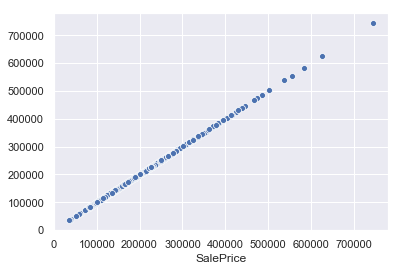

In [201]:
sns.scatterplot(x= yTrain, y= yTrainPredPolyReg)

In [214]:
modelRMSE(polyReg, XTrainPrepPoly)

1.8932995680298424e-05


In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
forestReg= RandomForestRegressor(n_estimators= 500, n_jobs= -1)
forestReg.fit(XTrainPrep, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
yTrainPred= forestReg.predict(XTrainPrep)

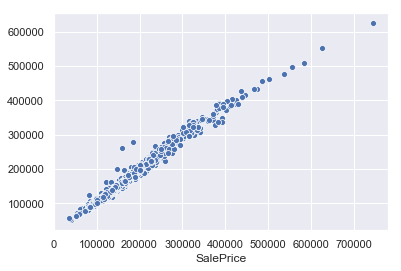

In [222]:
sns.scatterplot(yTrain, yTrainPred)

In [223]:
modelRMSE(forestReg, X= XTrainPrep)

11446.881784359937


In [224]:
crossValSummary(forestReg, X= XTrainPrep)

RMSE:  [22339.38558484 38616.51642142 25324.18560375 39038.4319838
 41643.97134113 36195.42418019 27333.36399992 24274.39384297
 27574.68393667 26058.36526767]
RMSCMean:  30839.872216235275
RMSCsd:  6816.9605632875455


In [215]:
def crossValSummary(model, X):
    scores = cross_val_score(model, X, yTrain, cv= 10, scoring= 'neg_mean_squared_error')
    modelRMSC = np.sqrt(-scores)
    modelRMSCMeanScores = modelRMSC.mean()
    modelRMSCsd= modelRMSC.std()
    print('RMSE: ', modelRMSC)
    print('RMSCMean: ', modelRMSCMeanScores)
    print('RMSCsd: ', modelRMSCsd)

In [218]:
crossValSummary(polyReg, X= XTrainPrepPoly)

RMSE:  [ 84737.61296774 186968.5161323   68905.22488569 180483.91643861
 114399.08188608  94312.90132615 742366.69808893  72653.31651058
 156715.40164476  93429.23018965]
RMSCMean:  179497.19000704846
RMSCsd:  192074.2776303954


## SGD

In [46]:
from sklearn.linear_model import SGDRegressor


In [48]:
sgdReg = SGDRegressor(n_iter= 50, penalty= None, eta0= 0.1)

In [49]:
sgdReg.fit(XTrainPrep, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [50]:
yTrainPred = sgdReg.predict(XTrainPrep)

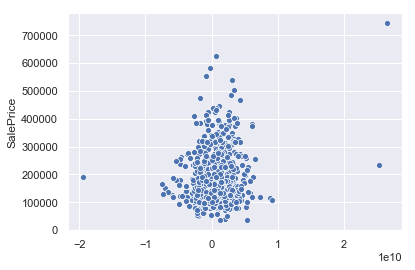

In [52]:
sns.set()
sns.scatterplot(x= yTrainPred, y= yTrain)

In [61]:
scores = cross_val_score(linReg, XTrainPrep, yTrain, cv = 10)

NameError: name 'cross_val_score' is not defined

In [183]:
displayScores(scores)

Scores:  [-1.50216846  0.87930868  0.90380174  0.58805436 -0.5466272   0.89193234
  0.50884469  0.91655078  0.48944474  0.87838919]
Mean:  0.40075308717410385
sd:  0.760972113364332


## Decesion tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
treeReg = DecisionTreeRegressor()

In [50]:
treeReg.fit(XTrainPrep, yTrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
yTrainPred = treeReg.predict(XTrainPrep)

In [52]:
treeRegMSE = metrics.mean_squared_error(yTrain, yTrainPred)
treeRegRMSE = np.sqrt(treeRegMSE)
treeRegRMSE

0.0

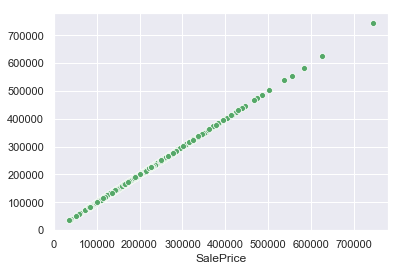

In [53]:
sns.scatterplot(x= yTrain, y= yTrainPred, color = 'g')

### Cross Valiation

In [54]:
from sklearn.model_selection import cross_val_score

In [58]:
scores = cross_val_score(linReg, XTrainPrep, yTrain, cv= 10)

In [59]:
def displayScores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('sd: ', scores.std())

In [60]:
displayScores(scores)

Scores:  [-8.83534470e+19 -1.17123489e+17 -5.64912981e+20 -4.07548253e+17
 -3.80942809e+21 -3.60620650e+18 -1.57443699e+18 -6.97914511e+18
 -1.59300694e+18 -3.48169322e+18]
Mean:  -4.480453677169775e+20
sd:  1.1327536311792885e+21


### Randomforest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
forestReg = RandomForestRegressor()

In [64]:
forestReg.fit(XTrainPrep, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
yTrainPred = forestReg.predict(XTrainPrep)

In [66]:
forestRegMSE = metrics.mean_squared_error(yTrain, yTrainPred)
forestRegRMSE = np.sqrt(forestRegMSE)
forestRegRMSE

15061.10559221515

In [210]:
scores = cross_val_score(forestReg, XTrainPrep, yTrain, cv= 10)

In [211]:
displayScores(scores)

Scores:  [0.87611677 0.78873434 0.87411625 0.75143643 0.68726914 0.83580702
 0.83369964 0.839545   0.784909   0.82288512]
Mean:  0.8094518702777475
sd:  0.05506384162023951


In [212]:
yTrainPred = forestReg.predict(XTrainPrep)

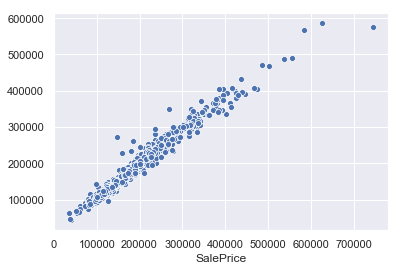

In [213]:
sns.scatterplot(yTrain, yTrainPred)